# Solución de ecuaciones
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para el curso de <code>Métodos Numéricos</code></p>
<style type="text/css">
    .border {
        display: inline-block;
        border: solid 1px rgba(204, 204, 204, 0.4);
        border-bottom-color: rgba(187, 187, 187, 0.4);
        border-radius: 3px;
        box-shadow: inset 0 -1px 0 rgba(187, 187, 187, 0.4);
        background-color: inherit !important;
        vertical-align: middle;
        color: inherit !important;
        font-size: 11px;
        padding: 3px 5px;
        margin: 0 2px;
    }
</style>


## Busqueda de raíces por métodos cerrados
Los métodos iterativos cerrados, por intervalos o de horquillado se caracterizan porque para su ejecución requieren un intervalo que contenga al menos una raíz y en su aplicación se reduce continuamente de tamaño el intervalo manteniendo la raíz en su interior.

## Agenda
1. Generalidades
1. Método de la bisección
1. Metodo de la falsa posición

In [3]:
# Importar módulos al cuaderno de jupyter
import math as m 
import numpy as np
import pylab as plt

# Definir e incluir nuevas funciones al cuaderno
def _buscar_intervalos(fun, ini, fin):
    """ Método para buscar intervalos en los que ocurra cambio de signo.

        ## Parámetros:
            fun (function): función para analizar.
            ini (int): inicio del análisis.
            fin (int): limite final del análisis.
        
        ## Devoluciones:
            I (list): Lista de tuplas con los intervalos donde hay un cero.
    """
    i = ini - 1 # Variable para contar iteraciones
    I = []      # Variable para almacenar los intervalos
    
    while i < fin:
        i += 1
        if fun(i) == 0:
            I.append((i, i))
        if fun(i) * fun(i+1) < 0:
            I.append((i, i+1))
        else:
            pass
    return I


## 1. Metodos Cerrados
---
Basados en el teorema del valor intermedio, los métodos de horquillado determinan intervalos sucesivamente más pequeños que contienen una raíz; por lo tanto, requieren comenzar con un intervalo tal que la función tome signos opuestos en los puntos finales del intervalo.

* **NOTA:** El _teorema del valor intermedio_ establece que si $f(a)<y<f(b)$ entonces existe un $c \in (a, b)$ tal que $f(c) = y$

## 2. Método de la bisección
---
En análisis numérico, el método de bisección es un algoritmo que busca las raíces de una función tomando un intervalo inicial, dividiendo sucesivamente el intervalo a la mitad y seleccionando el subintervalo que tiene la raíz; hasta hallar una aproximación o la raíz que satisface la función.

\begin{align}
x_n & = \frac{\left| a - b \right|}{2^n} \\
x_n & = \frac{\left| x_s - x_i \right|}{2^n} \\
\end{align}

<p align="center">
  <img height="400" src="img/algorithm_open_1.png">
</p>

### Ventajas:
* Método estable, siempre converge.
* Útil como aproximación inicial de otros métodos.

### Desventajas:
* No tiene en cuenta la magnitud de los valores de la función en las aproximaciones calculadas $x_n$, solo tiene en cuenta el signo de $f(x)$.
* Método linealmente convergente
* Orden de convergencia, $r = 1$.
* Tasa de convergencia $\mu = 0.5$


In [ ]:
# Defino el método iterativo de la Bisección
def _biseccion(FunX, Xmin, Xmax, Imax, Tmax):
    """ Método de la Bisección para encontrar raíces en un intervalo.

        ## Parámetros:
            funX (int): función que depende de una variable.
            Xmin (int): limite inferior de intervalo.
            Xmax (int): limite superior de intervalo.
            Imax (int): número máximo de iteraciones.
            Tmax (int): exponente de tolerancia máxima, T = 1e^Tmax.
        
        ## Devoluciones:
            Km (float): valor de x encontrado.
            No (int)  : iteraciones.
            Tb (str): tabla con evoluvión de iteraciones.
    """
    # Inicializar variables
    Xs = Xmax
    Xi = Xmin
    Ea = []
    Tb = f"| I # | {'Xi':>8} | {'Xs':>8} | {'ΔX':>9} | {'Xm':>9} | {'Error Abs':>9} | {'Fm':>9} |\n"
    Tb += "-----------------------------------------------------------------------------\n"
    # Iteraciones
    for No in range(1, Imax + 1):
        ΔX = abs(Xs - Xi)
        ea = ΔX / 2
        Ea.append(ea)
        Xm = (Xs + Xi) / 2
        Fm = F(Xm)
        Tb += f"| {No:3} | {Xi:8.5f} | {Xs:8.5f} | {ΔX:9.5f} | {Xm:9.5f} | {ea:9.5f} | {Fm:9.5f} |\n"
        if ea < (10**Tmax): break
        if F(Xi) * F(Xm) < 0:
            Xs = Xm
        else:
            Xi = Xm
    #Salida del método
    return Xm, No, ea, Tb


## 3. Metodo de la falsa posición
---
### a. Ecuaciones lineales
Un caso particular de las ecuaciones algebraicas sucede cuando solo los dos primeros coeficientes son distintos de cero y la solucion para x es unica y trivial.

\begin{align}
a_0 + a_1 x & = 0, \quad a_1 \neq 0 \\
x & = \frac{-a_0}{a_1} \\
\end{align}

<p align="center">
  <img height="400" src="img/algorithm_open_2.png">
</p>

### Ventajas:
* Metodo estable, siempre converge.
* Útil como aproximación inicial de otros métodos.

### Desventajas:
* No tiene en cuenta la magnitud de los valores de la función en las aproximaciones calculadas $x_n$, solo tiene en cuenta el signo de $f(x)$.
* Método linealmente convergente
* Orden de convergencia, $r = 1$.
* Tasa de convergencia $\mu = 0.5$

In [15]:
# Defino el método iterativo de la Bisección
def _punto_falso(FunX, Xmin, Xmax, Imax, Tmax):
    """ Método de la falsa posición para encontrar raíces en un intervalo.

        ## Parámetros:
            funX (int): función que depende de una variable.
            Xmin (int): limite inferior de intervalo.
            Xmax (int): limite superior de intervalo.
            Imax (int): número máximo de iteraciones.
            Tmax (int): exponente de tolerancia máxima, T = 1e^Tmax.
        
        ## Devoluciones:
            Km (float): valor de x encontrado.
            No (int)  : iteraciones.
            Tb (str): tabla con evoluvión de iteraciones.
    """
    # Inicializar variables
    Xs = Xmax
    Xi = Xmin
    Ea = []
    Tb = f"| I # | {'Xi':>8} | {'Xs':>8} | {'ΔX':>9} | {'Xm':>9} | {'Error Abs':>9} | {'Fm':>9} |\n"
    Tb += "-----------------------------------------------------------------------------\n"
    # Iteraciones
    for No in range(1, Imax + 1):
        ΔX = abs(Xs - Xi)
        ea = ΔX / 2
        Ea.append(ea)
        Xm = (Xs + Xi) / 2
        Fm = F(Xm)
        Tb += f"| {No:3} | {Xi:8.5f} | {Xs:8.5f} | {ΔX:9.5f} | {Xm:9.5f} | {ea:9.5f} | {Fm:9.5f} |\n"
        if ea < (10**Tmax): break
        if F(Xi) * F(Xm) < 0:
            Xs = Xm
        else:
            Xi = Xm
    #Salida del método
    return Xm, No, ea, Tb

In [9]:
# Ecuación de la altura para el movimiento parabólico
def altura(θ, Vo, ho, t):
    g = 9.8179
    Voy = Vo * np.sin(θ*np.pi/180)
    y = -(1/2) * g * t**2 + Voy * t + ho
    return y


# Renombrar la función
F = lambda t: altura(45, 12, 3, t) 

lista = _buscar_intervalos(F, -5, 5)
print(lista)
print(lista[0])
print(lista[0][0])
type(lista[0])

In [14]:
# Ecuación de la altura para el movimiento parabólico
def altura(θ, Vo, ho, t):
    g = 9.8179
    Voy = Vo * np.sin(θ*np.pi/180)
    y = -(1/2) * g * t**2 + Voy * t + ho
    return y

# Intervalo
Kmin = 0
Kmax = 4

# Funciones
F = lambda t: altura(45, 12, 3, t)                  # Altura
t = np.linspace(Kmin, Kmax, 1024, endpoint=True)    # Tiempo
E = []                                              # Error    
K = []                                              # Raiz

# Método de la Bisección
Iteraciones = 100
Tolerancia = 1e-10

# Re-inicializar variables
Ki = Kmin
Ks = Kmax
Fi = F(Ki)
Fs = F(Ks)
n = 0

# Iteraciones
while n < Iteraciones:
    n += 1
    ΔK = abs(Ks-Ki)
    ea = ΔK/(2**n)
    Km = Ki + (Ks - Ki) / 2
    E.append(ea)
    K.append(Km)

    Fm = F(Km)

    # Tabla
    # print(f"| {n:3d} | Ki: {Ki:.5f} | Ks: {Ks:.5f} | ea: {ea:12.9f} | fn: {Fm:12.9f} |")
    
    # Prueba de solución exacta
    if Fm == 0:
        print("---------------------------------")  
        print("Solución exacta encontrada")        
        break

    if F(Ki) * F(Km) < 0:
        Ks = Km
    else:
        Ki = Km

    # Prueba de tolerancia
    if ΔK < Tolerancia:
        
        print(f"---------------------------------") 
        print(f" Solución aproximada encontrada")
        print(f" Con un error: {ΔK:16.2e}")
        if len(E)>4:
            q = np.log10((E[-1] - E[-2]) / (E[-2] - E[-3]))/np.log10((E[-2] - E[-3]) / (E[-3] - E[-4]))
            print(f" Orden:                       {int(q)}")

        break

    
# Salida
print(f"---------------------------------")
print(f"| Número de Iteraciones:     {n} |")
print(f"---------------------------------")
print(f"| Tiempo aproximada: {Km:10.5f} |")
print(f"| altura aproximada: {Fm:10.5f} |")
print(f"---------------------------------")

---------------------------------
 Solución aproximada encontrada
 Con un error:         5.82e-11
 Orden:                       1
---------------------------------
| Número de Iteraciones:     37 |
---------------------------------
| Tiempo aproximada:    2.02964 |
| altura aproximada:   -0.00000 |
---------------------------------


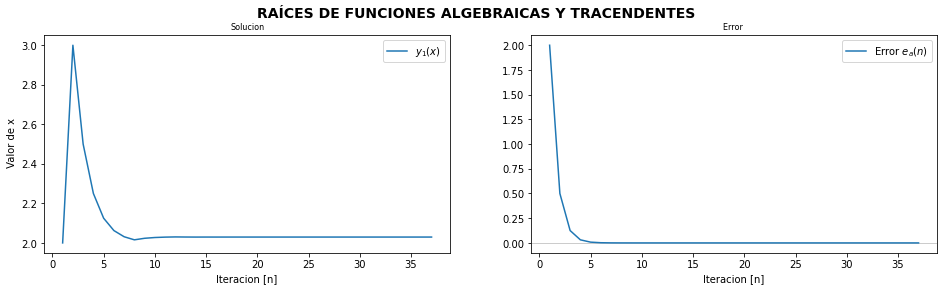

In [15]:
x = np.linspace(1, n, n, endpoint=True)
y1 = K
y2 = E

# Gráficas
#-------------------
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(16, 4)
fig.suptitle('Raíces de funciones algebraicas y tracendentes'.upper(), fontsize=14, fontweight="bold")

# Gráficas 1
# ax[0].axhline(y = 0, linewidth=1.0, color="#ccc")
ax[0].plot(x, y1, label="$y_1(x)$")
ax[0].set_title("Solucion", fontsize=8)
ax[0].set_ylabel(" Valor de x")
ax[0].set_xlabel("Iteracion [n]")
ax[0].legend()

# Gráficas 2
ax[1].axhline(y = 0, linewidth=1.0, color="#ccc")
ax[1].plot(x, y2, label="Error $e_a(n)$")
ax[1].set_title("Error ", fontsize=8)
ax[1].set_xlabel("Iteracion [n]")
ax[1].legend()

plt.show()

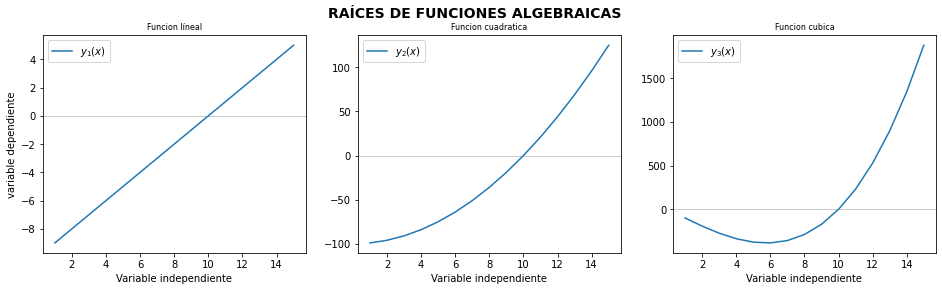

In [5]:
y3 = (x - 10)
y4 = (x - 10) * (x + 10)
y5 = (x - 10) * (x + 10) * x

# Gráficas
#-------------------
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(16, 4)
fig.suptitle('Raíces de funciones algebraicas'.upper(), fontsize=14, fontweight="bold")

# Gráficas 1
ax[0].axhline(y = 0, linewidth=1.0, color="#ccc")
ax[0].plot(x, y3, label="$y_1(x)$")
ax[0].set_title("Funcion líneal", fontsize=8)
ax[0].set_xlabel("Variable independiente")
ax[0].set_ylabel("variable dependiente")
ax[0].legend()

# Gráficas 2
ax[1].axhline(y = 0, linewidth=1.0, color="#ccc")
ax[1].plot(x, y4, label="$y_2(x)$")
ax[1].set_title("Funcion cuadratica", fontsize=8)
ax[1].set_xlabel("Variable independiente")
ax[1].legend()

# Gráficas 3
ax[2].axhline(y = 0, linewidth=1.0, color="#ccc")
ax[2].plot(x, y5, label="$y_3(x)$")
ax[2].set_title("Funcion cubica", fontsize=8)
ax[2].set_xlabel("Variable independiente")
ax[2].legend()

plt.show()

## 2. Solución de ecuaciones no lineles
---
### a. Ecuaciones algebraica
* El numero de raices es igual al grado del polinomio asociado.
* La posible existencia de raíces múltiples complica el problema.

### b. Ecuaciones tracendentes
* Puede tener cualquier número de posibles soluciones.
* Puede tener ninguna, una o múltiples raíces, donde tanto la función como su derivada son iguales a cero.



## 4. Estabilidad
---
Dado que algunos métodos numéricos no siempre convergen, se entiende por estabilidad de un método numérico el nivel de garantía de dicha convergencia; en la medida en la que un método numérico, ante una muy amplia gama de posibilidades de modelado matemático, es más seguro que converja que otro, entonces se dice que tiene una mayor estabilidad.

* _**Criterio de la perturbación inicial:**_ Si definimos esta perturbación como el error introducido al finalizar la primera iteración, este criterio propone que la perturbación inicial debe estar acotada.

* _**criterio de la propagación del error:**_  Si definimos la propagación como el efecto de la perturbación en la solución debida a la perturbación inicial, este criterio propone una pequeña perturbación inicial no debe implicar más que una pequeña perturbación en la solución, independientemente del paso.

* _**Criterio de linealidad:**_ la propagación lineal de los errores en cada iteración suele ser inevitable, pero permite resultados aceptables en la mayoría de los métodos; en cambio el error crece rápidamente en cada iteración con una propagación exponencial de los errores, lo que finalmente conduce a soluciones inexactas y métodos inestables.

### <code>Ejemplo:</code> Propagación del error (Convergencia vs Estabilidad)
---
Para tener una idea de por qué importa más la potencia en <code>$\Delta x$</code> al considerar la convergencia, la siguiente figura muestra cómo las diferentes potencias en la tasa de convergencia pueden afectar la rapidez con la que converge nuestra solución. 

Representar el error como una función de <code>$\Delta x$</code> en una gráfica es una forma común de mostrar que un método numérico está haciendo lo que esperamos y muestra el comportamiento de convergencia correcto y dado que los errores pueden reducirse rápidamente, es muy común trazar este tipo de gráficos en una escala <code>log-log</code> para visualizar fácilmente los resultados. 

>**NOTA:** Tenga en cuenta que aquí estamos dibujando los mismos datos de dos maneras diferentes y que si un método fuera realmente del orden $n$, será una función lineal en el espacio log-log con pendiente n.

 

---
## Mas Recursos

- [Búsqueda de raíces](https://es.wikipedia.org/wiki/Resoluci%C3%B3n_num%C3%A9rica_de_ecuaciones_no_lineales) (Wikipedia)
- [Método de bisección](https://es.wikipedia.org/wiki/M%C3%A9todo_de_bisecci%C3%B3n) (Wikipedia)
- [Estabilidad numérica](https://es.wikipedia.org/wiki/Estabilidad_num%C3%A9rica) (Wikipedia)
- [Orden de convergencia](https://es.wikipedia.org/wiki/Orden_de_convergencia) (Wikipedia)
